# Analyze Model Weights

In [1]:
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(
    context="paper", 
    style="whitegrid", 
    font_scale=1.2,
    rc={'figure.figsize': (20, 20), 'figure.dpi': 300}
)

## ICC

In [2]:
%%time
import pingouin as pg
from common.data import get_model_weights
from common.wisc import WISC_LEVEL
from common.binning import BIN_LABELS
from common.paths import MODEL_RESULTS
from common.results import save_results

results = []
population = 'adhd'

for bin_label in BIN_LABELS:
    for target in WISC_LEVEL[5]:
        pls_weights = get_model_weights('pls', population, target, bin_label)
        ridge_weights = get_model_weights('ridge', population, target, bin_label)
        
        icc_data = pd.DataFrame([pls_weights, ridge_weights]).melt(
            var_name='connection', value_name='weight', ignore_index=False)
        icc_data['cv_run_num'] = icc_data.index
        icc = pg.intraclass_corr(data=icc_data, targets='connection', raters='cv_run_num', ratings='weight').round(3)
        icc1 = icc[icc['Type'] == 'ICC1'].to_dict('records')[0]
        
        results.append({
            'Population': population,
            'Target': target,
            'Bin': bin_label,
            **icc1,
        })
#         print(results[-1])
        
results_df = pd.DataFrame(results)
display(results_df)
filename = f'between-model_icc_{population}.csv'
save_results(results_df, filename, MODEL_RESULTS)

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


{'Population': 'adhd', 'Target': 'WISC_FSIQ', 'Bin': 'All', 'Type': 'ICC1', 'Description': 'Single raters absolute', 'ICC': 0.959, 'F': 47.922, 'df1': 34715, 'df2': 34716, 'pval': 0.0, 'CI95%': array([0.96, 0.96])}
{'Population': 'adhd', 'Target': 'WISC_VSI', 'Bin': 'All', 'Type': 'ICC1', 'Description': 'Single raters absolute', 'ICC': 0.961, 'F': 49.906, 'df1': 34715, 'df2': 34716, 'pval': 0.0, 'CI95%': array([0.96, 0.96])}
{'Population': 'adhd', 'Target': 'WISC_VCI', 'Bin': 'All', 'Type': 'ICC1', 'Description': 'Single raters absolute', 'ICC': 0.96, 'F': 48.804, 'df1': 34715, 'df2': 34716, 'pval': 0.0, 'CI95%': array([0.96, 0.96])}
{'Population': 'adhd', 'Target': 'WISC_FRI', 'Bin': 'All', 'Type': 'ICC1', 'Description': 'Single raters absolute', 'ICC': 0.959, 'F': 47.329, 'df1': 34715, 'df2': 34716, 'pval': 0.0, 'CI95%': array([0.96, 0.96])}
{'Population': 'adhd', 'Target': 'WISC_WMI', 'Bin': 'All', 'Type': 'ICC1', 'Description': 'Single raters absolute', 'ICC': 0.948, 'F': 37.679, '

Population     Target    Bin  Type             Description    ICC        F  \
0        adhd  WISC_FSIQ    All  ICC1  Single raters absolute  0.959   47.922   
1        adhd   WISC_VSI    All  ICC1  Single raters absolute  0.961   49.906   
2        adhd   WISC_VCI    All  ICC1  Single raters absolute  0.960   48.804   
3        adhd   WISC_FRI    All  ICC1  Single raters absolute  0.959   47.329   
4        adhd   WISC_WMI    All  ICC1  Single raters absolute  0.948   37.679   
5        adhd   WISC_PSI    All  ICC1  Single raters absolute  0.955   43.305   
6        adhd  WISC_FSIQ  Bin 1  ICC1  Single raters absolute  0.973   74.319   
7        adhd   WISC_VSI  Bin 1  ICC1  Single raters absolute  0.948   37.758   
8        adhd   WISC_VCI  Bin 1  ICC1  Single raters absolute  0.968   61.716   
9        adhd   WISC_FRI  Bin 1  ICC1  Single raters absolute  0.986  137.652   
10       adhd   WISC_WMI  Bin 1  ICC1  Single raters absolute  0.964   53.987   
11       adhd   WISC_PSI  Bin 1  ICC1  Single raters absolute  0.924   25.410   
12       adhd  WISC_FSIQ  Bin 2  ICC1  Single raters absolute  0.979   93.670   
13       adhd   WISC_VSI  Bin 2  ICC1  Single raters absolute  0.939   31.608   
14       adhd   WISC_VCI  Bin 2  ICC1  Single raters absolute  0.955   43.049   
15       adhd   WISC_FRI  Bin 2  ICC1  Single raters absolute  0.961   50.235   
16       adhd   WISC_WMI  Bin 2  ICC1  Single raters absolute  0.983  114.042   
17       adhd   WISC_PSI  Bin 2  ICC1  Single raters absolute  0.980  101.075   
18       adhd  WISC_FSIQ  Bin 3  ICC1  Single raters absolute  0.973   73.479   
19       adhd   WISC_VSI  Bin 3  ICC1  Single raters absolute  0.934   29.471   
20       adhd   WISC_VCI  Bin 3  ICC1  Single raters absolute  0.960   49.136   
21       adhd   WISC_FRI  Bin 3  ICC1  Single raters absolute  0.971   68.078   
22       adhd   WISC_WMI  Bin 3  ICC1  Single raters absolute  0.931   28.128   
23       adhd   WISC_PSI  Bin 3  ICC1  Single raters absolute  0.980   97.617   

      df1    df2  pval         CI95%  
0   34715  34716   0.0  [0.96, 0.96]  
1   34715  34716   0.0  [0.96, 0.96]  
2   34715  34716   0.0  [0.96, 0.96]  
3   34715  34716   0.0  [0.96, 0.96]  
4   34715  34716   0.0  [0.95, 0.95]  
5   34715  34716   0.0  [0.95, 0.96]  
6   34715  34716   0.0  [0.97, 0.97]  
7   34715  34716   0.0  [0.95, 0.95]  
8   34715  34716   0.0  [0.97, 0.97]  
9   34715  34716   0.0  [0.99, 0.99]  
10  34715  34716   0.0  [0.96, 0.96]  
11  34715  34716   0.0  [0.92, 0.93]  
12  34715  34716   0.0  [0.98, 0.98]  
13  34715  34716   0.0  [0.94, 0.94]  
14  34715  34716   0.0  [0.95, 0.96]  
15  34715  34716   0.0  [0.96, 0.96]  
16  34715  34716   0.0  [0.98, 0.98]  
17  34715  34716   0.0  [0.98, 0.98]  
18  34715  34716   0.0  [0.97, 0.97]  
19  34715  34716   0.0  [0.93, 0.94]  
20  34715  34716   0.0  [0.96, 0.96]  
21  34715  34716   0.0  [0.97, 0.97]  
22  34715  34716   0.0  [0.93, 0.93]  
23  34715  34716   0.0  [0.98, 0.98]

CPU times: user 11min 56s, sys: 3.92 s, total: 12min
Wall time: 11min 59s


## Plot weights

In [5]:
from common.binning import BIN_LABELS
from common.data import get_model_weights
from common.wisc import WISC_LEVEL

### Load weights

In [52]:
population = 'adhd'
model_weights = {k: None for k in BIN_LABELS}

for bin_label in BIN_LABELS:
    bin_weights = {k: None for k in WISC_LEVEL[5]}
    
    for target in WISC_LEVEL[5]:
        weight = get_model_weights('ridge', population, target, bin_label)
        bin_weights[target] = weight
        
    model_weights[bin_label] = bin_weights

print(model_weights.keys(), model_weights['Bin 1']['WISC_FSIQ'].shape)

dict_keys(['All', 'Bin 1', 'Bin 2', 'Bin 3']) (34716,)


### Filter weights by network

In [53]:
from common.data import filter_data_by_network
from common.power_atlas import POWER_NETWORKS

network = 'DMN'

for bin_label in BIN_LABELS:
    for target in WISC_LEVEL[5]:
        weight = model_weights[bin_label][target].reshape(1, -1)
        filtered_weight = filter_data_by_network(weight, POWER_NETWORKS[network], True, False)
        model_weights[bin_label][target] = filtered_weight

print(model_weights.keys(), model_weights['Bin 1']['WISC_FSIQ'].shape)

dict_keys(['All', 'Bin 1', 'Bin 2', 'Bin 3']) (1, 2701)


#### Raw weights

In [10]:
selected_features = model_weights['Bin 1']['WISC_FSIQ']
print(np.min(selected_features), np.max(selected_features))

-0.02203363 0.02092949


#### Manipulate weights

In [43]:
selected_features = model_weights['Bin 2']['WISC_FSIQ'] - model_weights['Bin 1']['WISC_FSIQ']
print(np.min(selected_features), np.max(selected_features))

-0.034027353 0.029626155


### Plot on glass brain

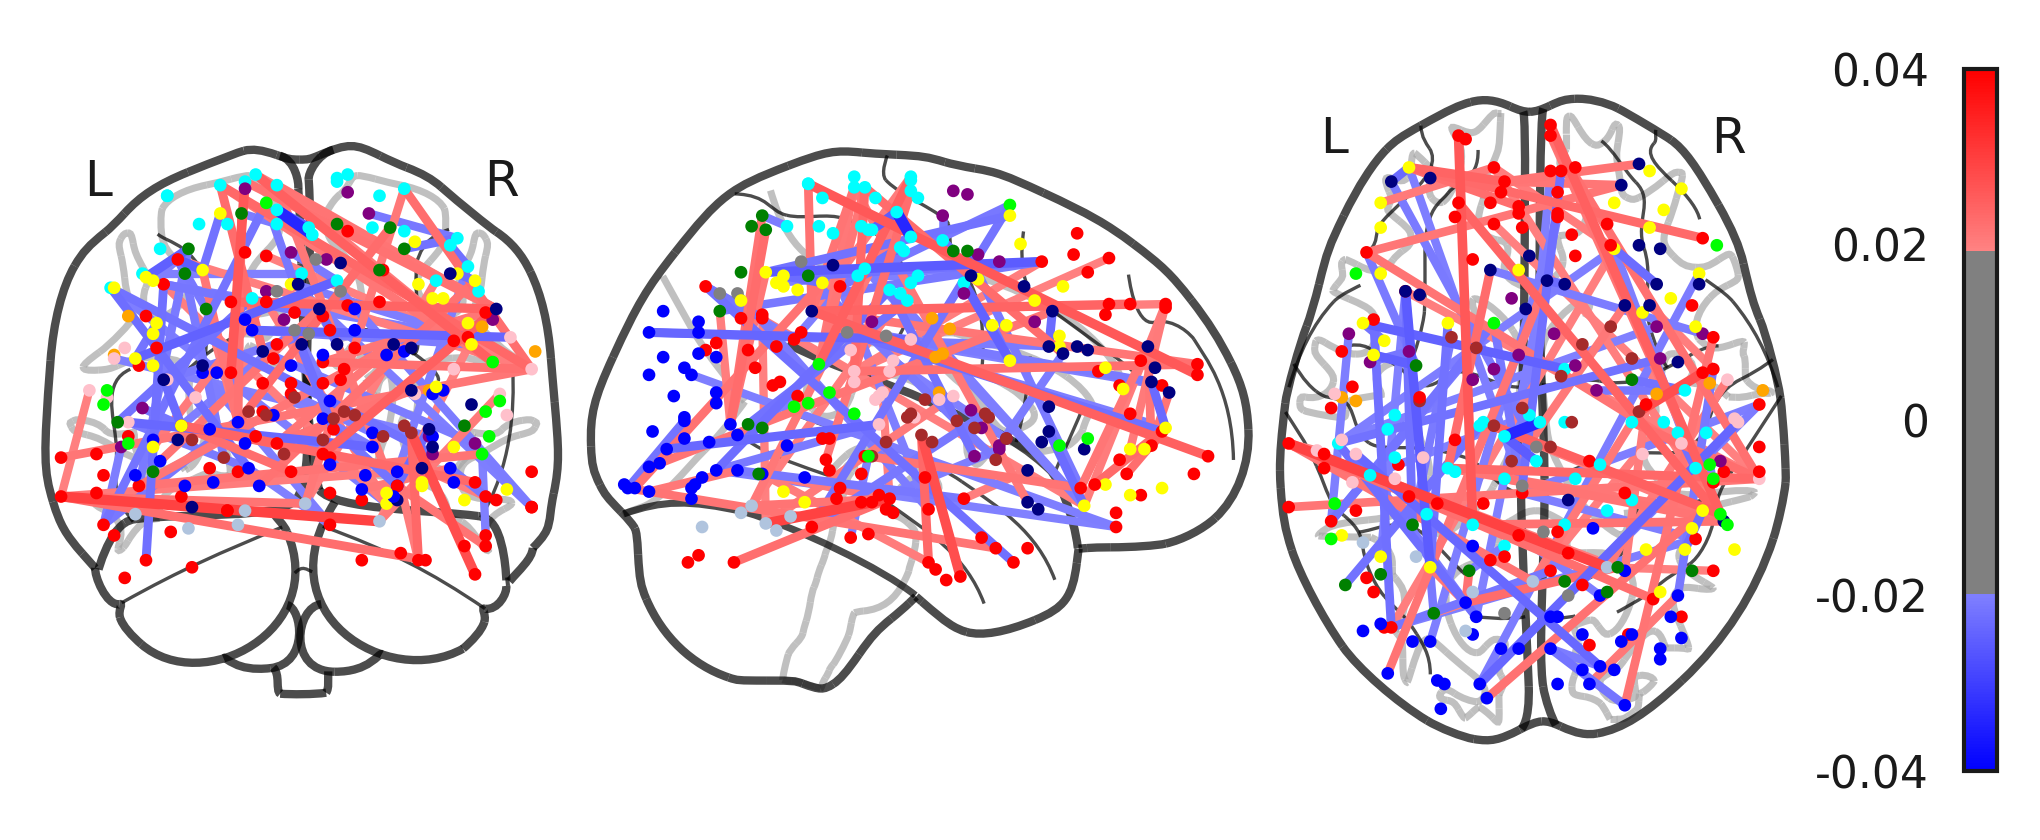

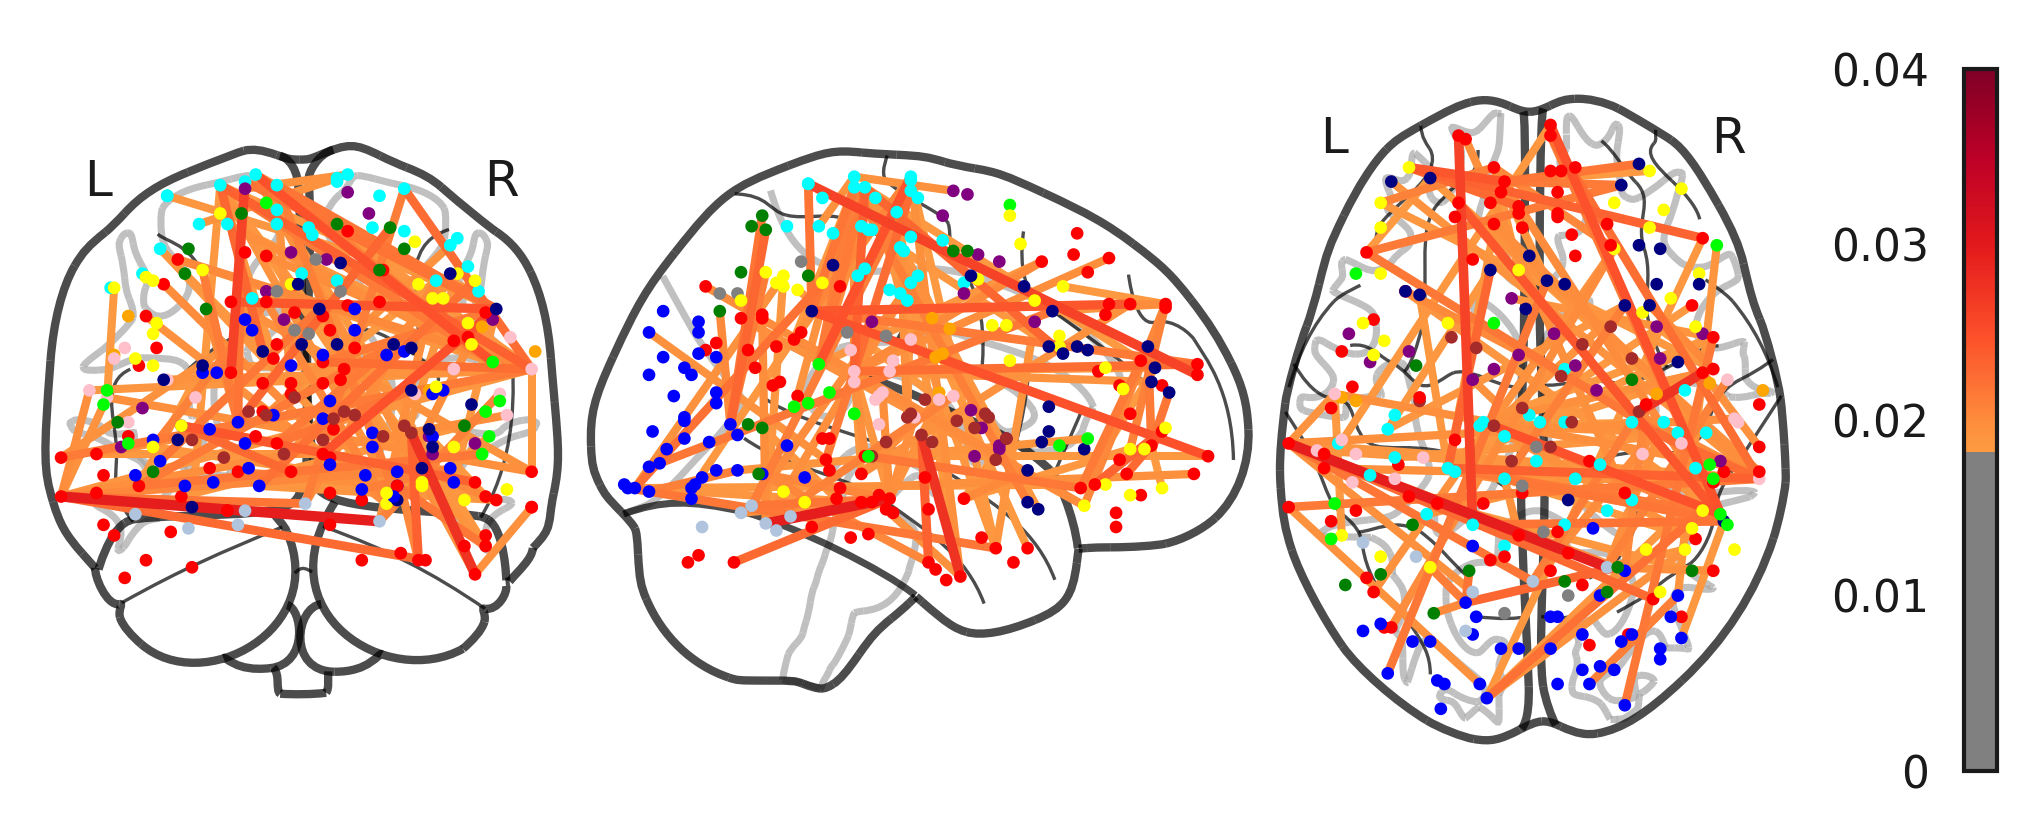

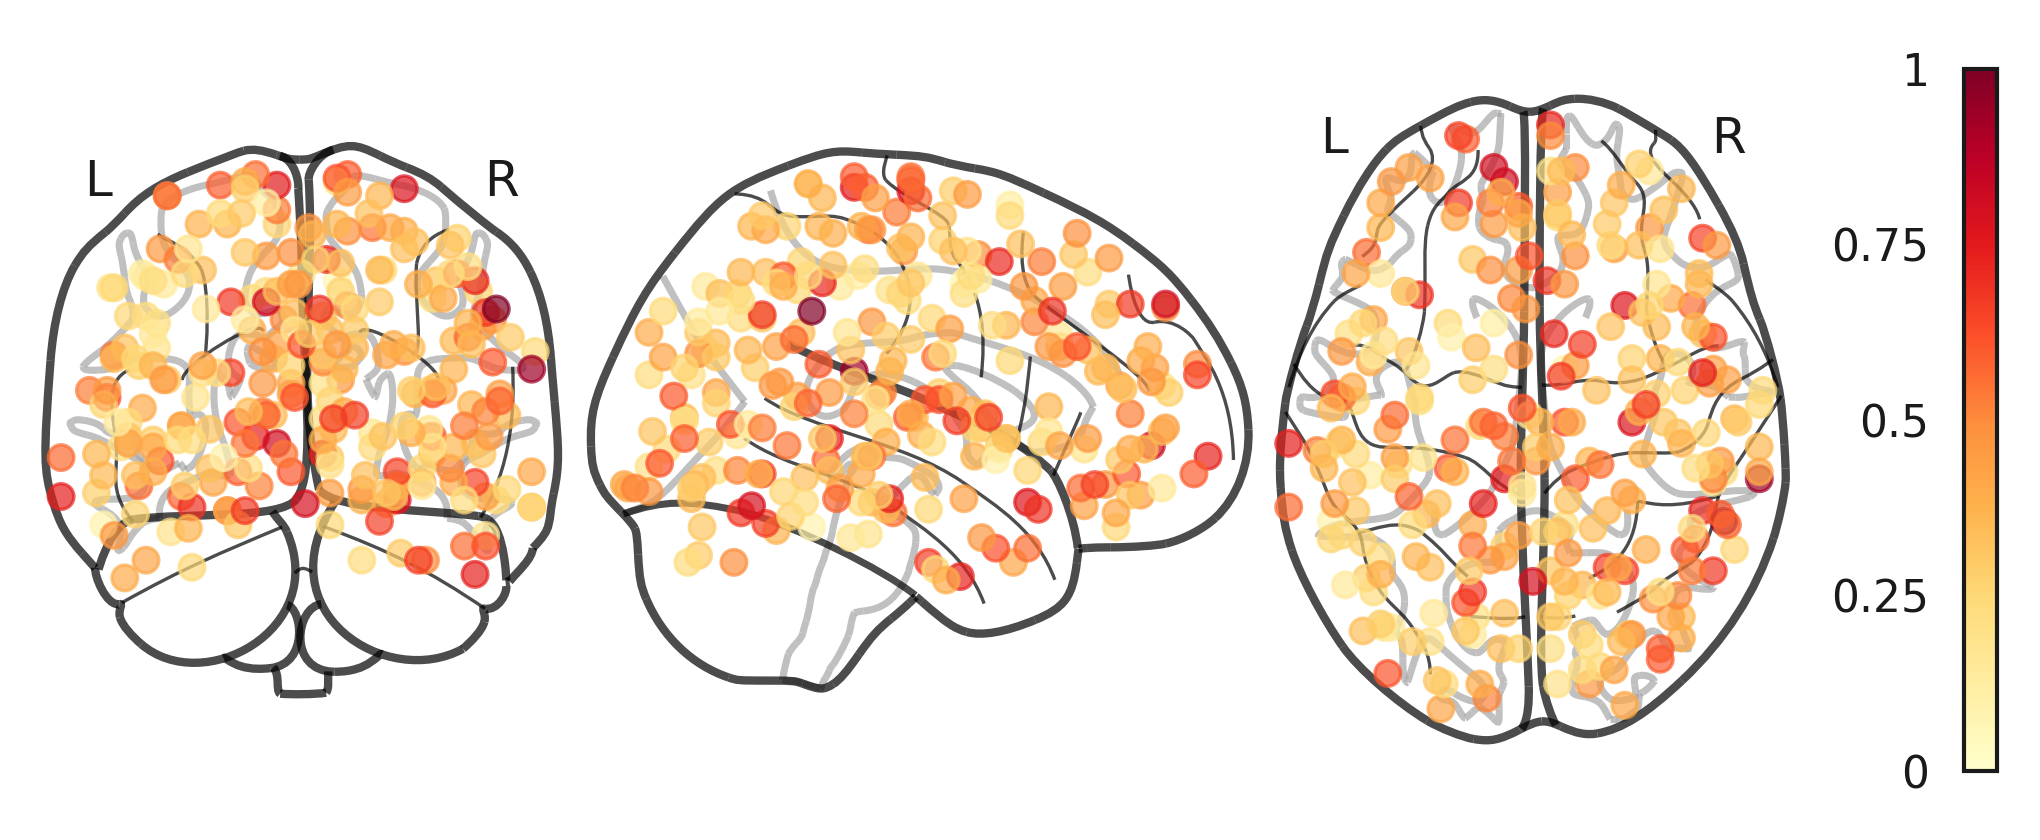

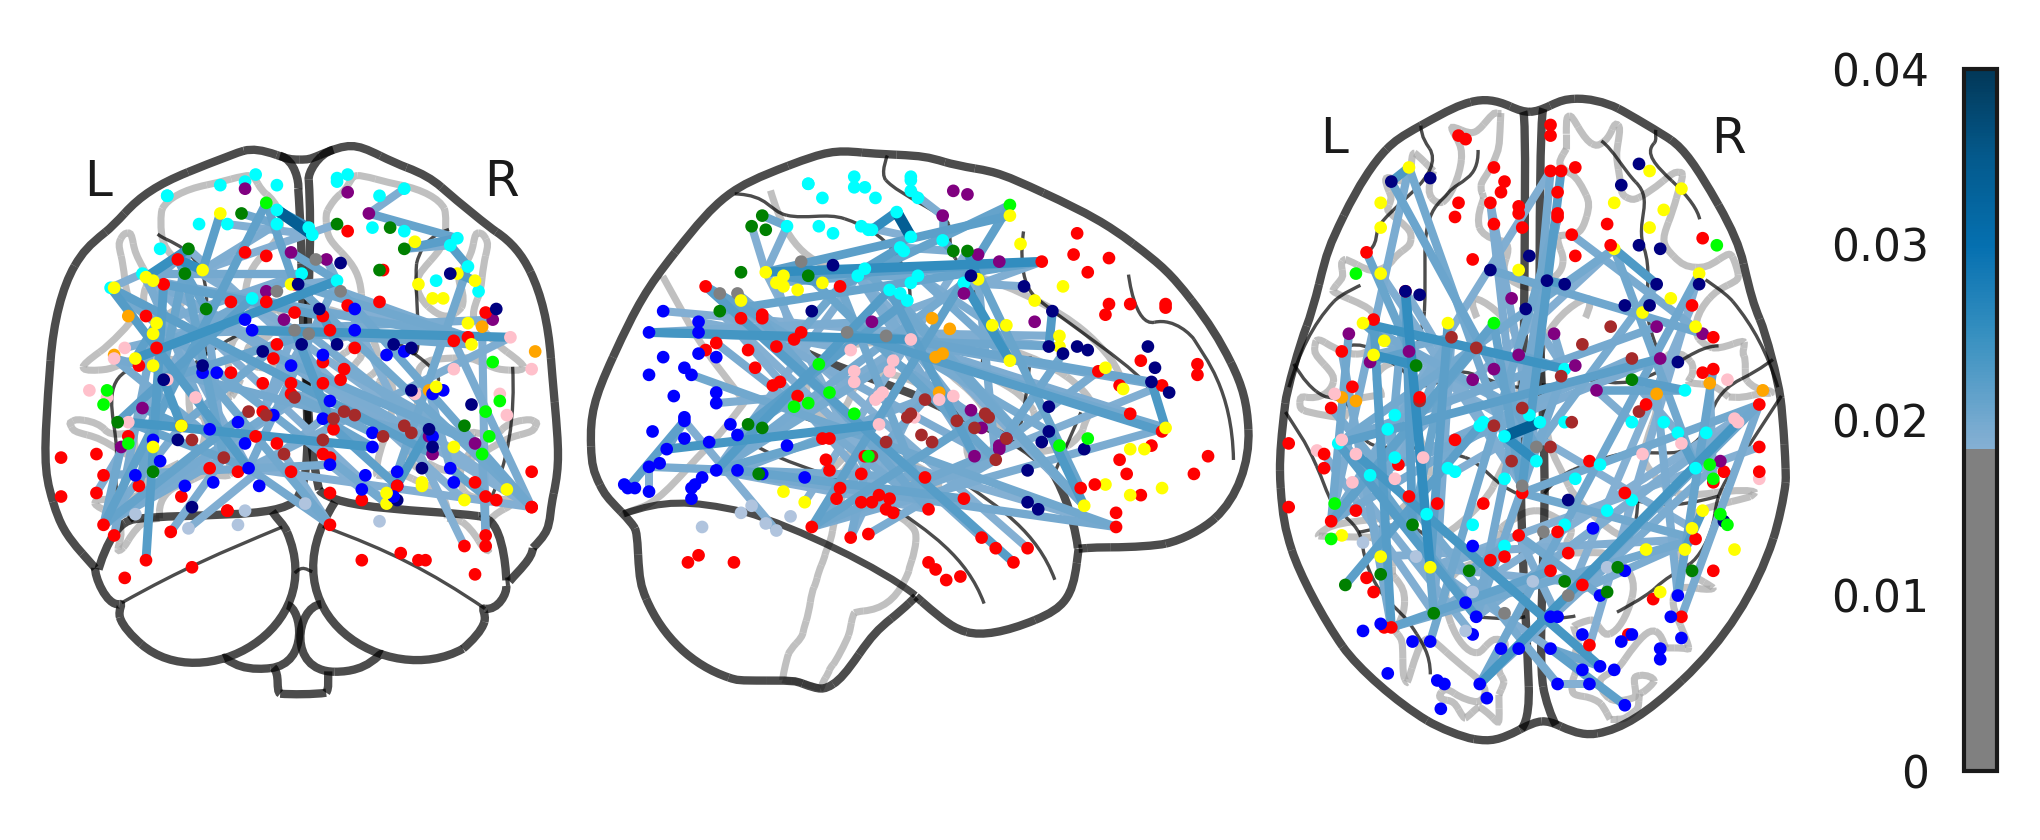

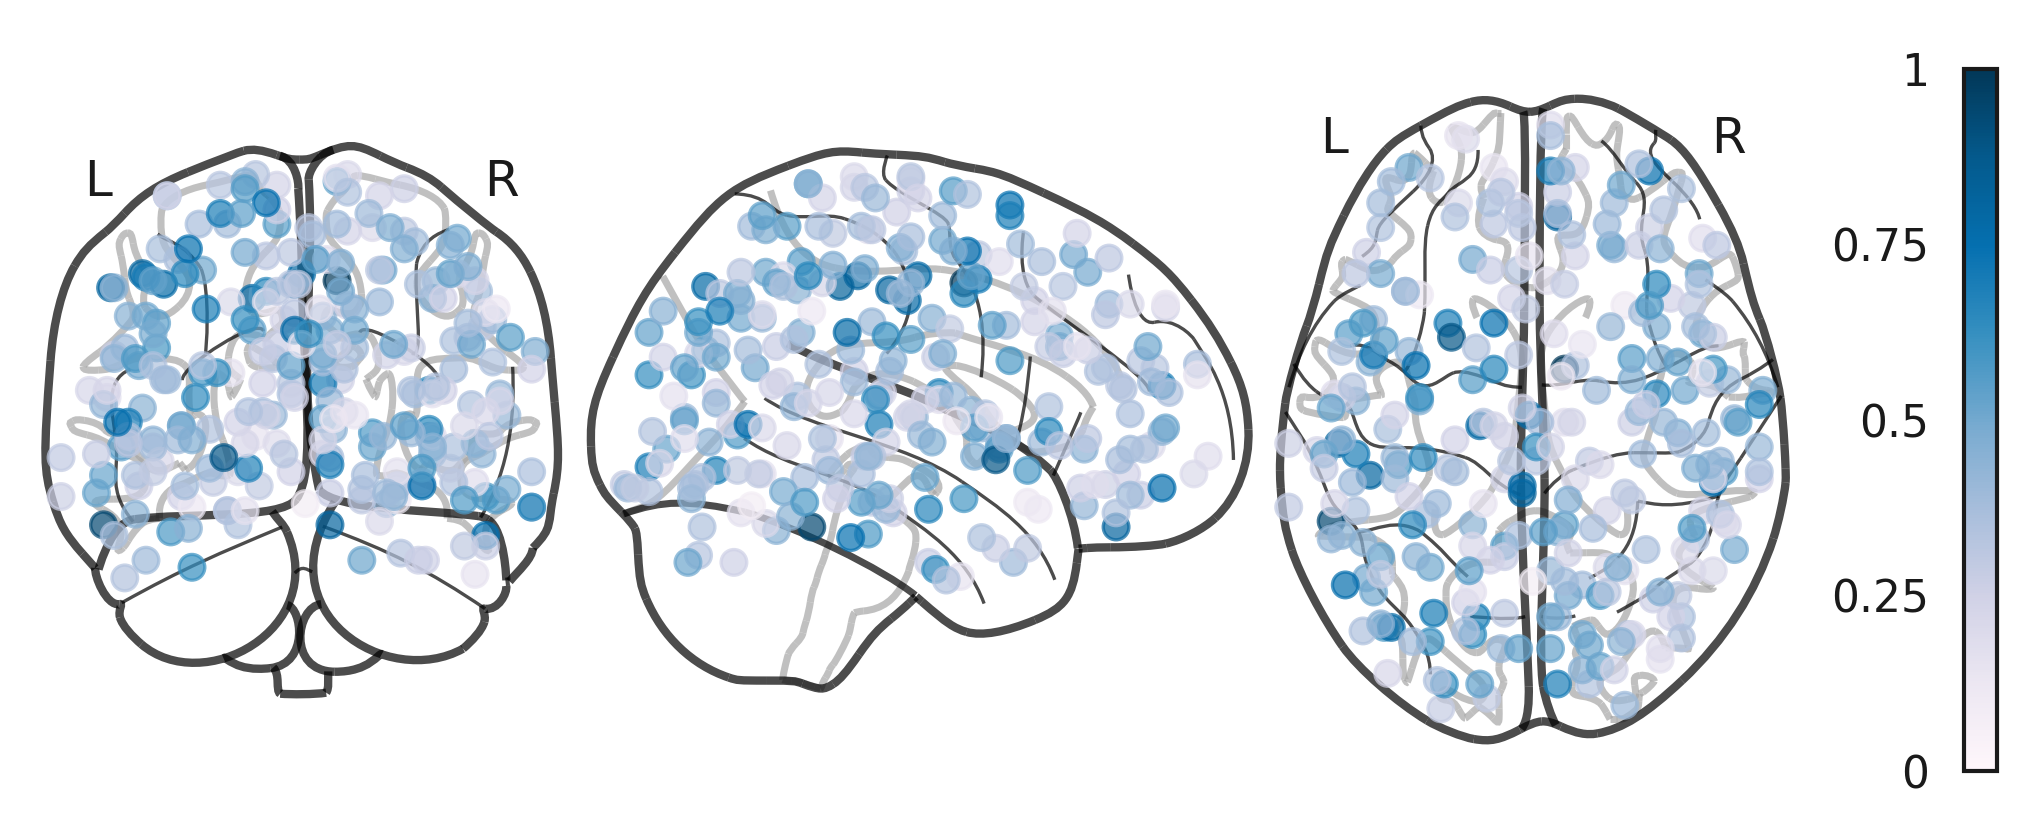

In [44]:
from common.plotting import plot_connections

plot_connections(selected_features, -0.04, 0.04, '99.7%', False, True, False)

### Plot on connectivity circle

In [11]:
from common.power_atlas import POWER_LABELS, to_power_fc_matrix, get_power_mpl_legend
from mne.viz import circular_layout, plot_connectivity_circle

In [40]:
node_order = POWER_LABELS.sort_values(by=['Assignment', 'ROI']).index
node_order = node_order.astype('str').to_list()

node_colors = POWER_LABELS['Color'].values.tolist()

num_nodes_per_system = POWER_LABELS['System'].value_counts().sort_index()
group_boundaries = np.array(np.cumsum(num_nodes_per_system.values)[:-1])

node_angles = circular_layout(node_names, node_order, group_boundaries=group_boundaries,
                              group_sep=0)

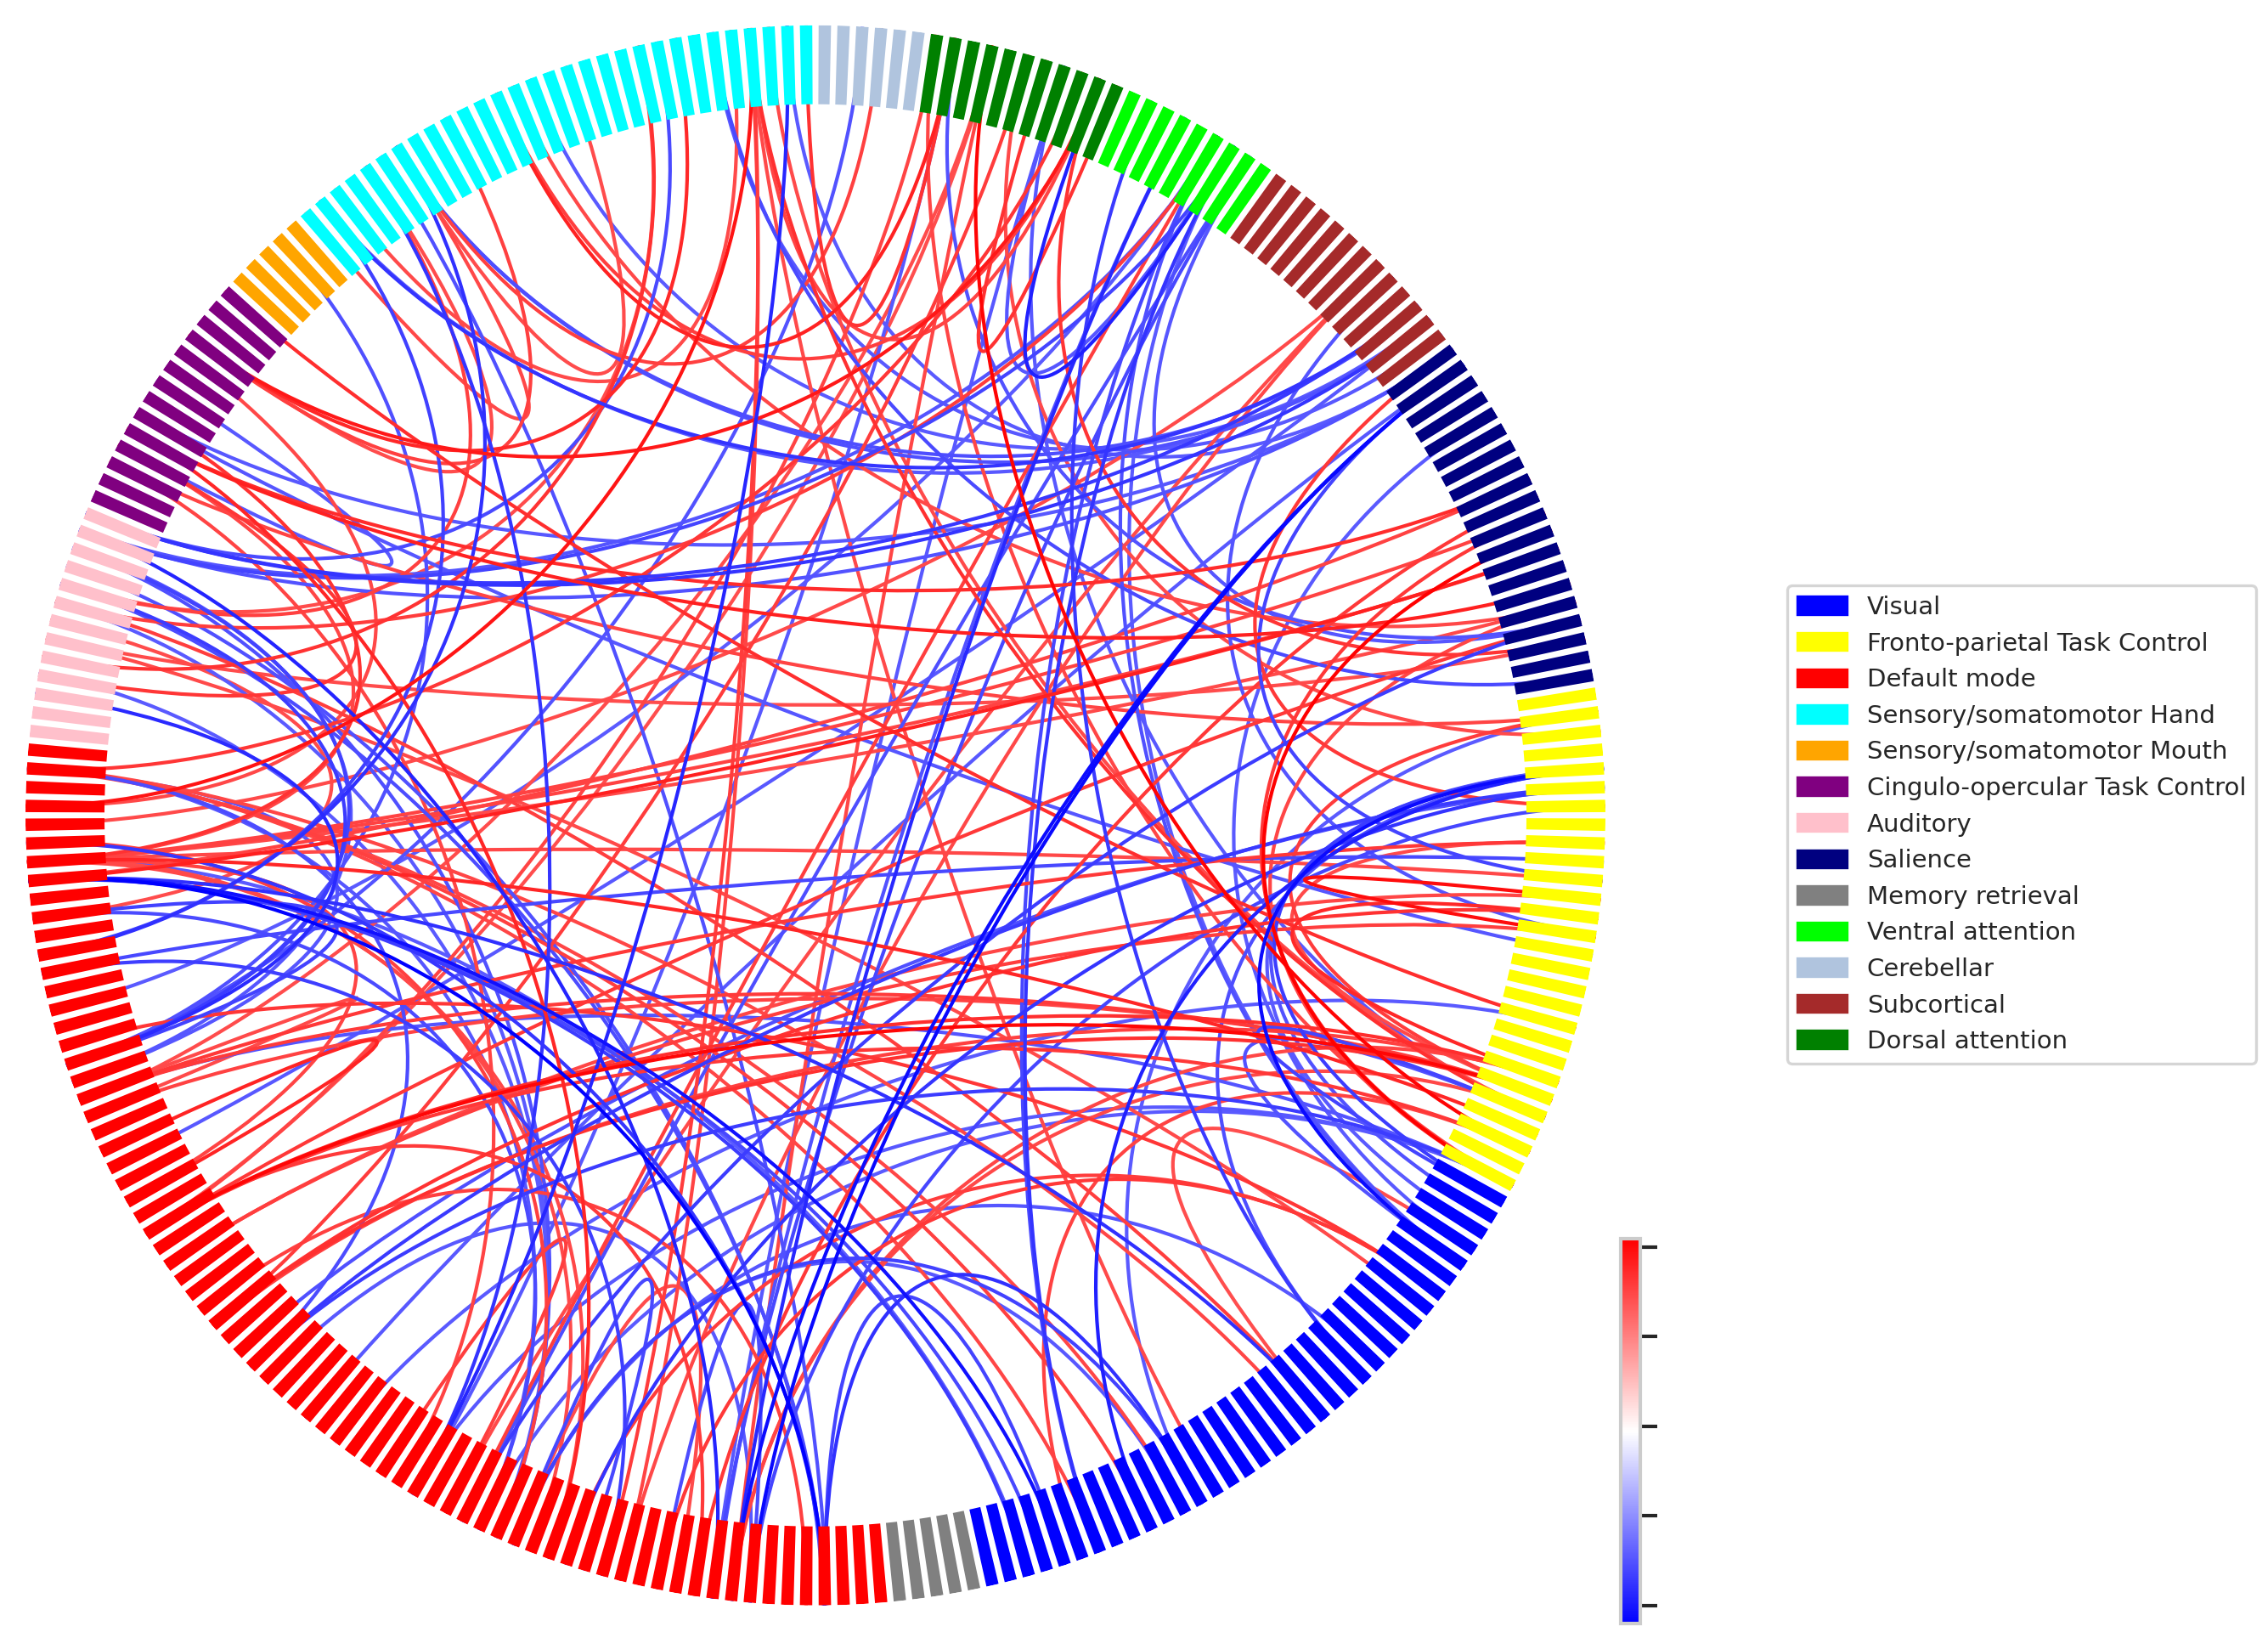

In [41]:
power_legend_patches = get_power_mpl_legend()
matrix = to_power_fc_matrix(selected_features)

plt.rc('legend',fontsize=7)
fig = plt.figure(figsize=(10, 10), facecolor=(0, 0, 0, 0))
fig.legend(handles=power_legend_patches, loc="center right")
node_names = ["" for node_num in range(1, 265)]

fig, ax = plot_connectivity_circle(
    matrix, node_names, n_lines=200, node_angles=node_angles, fontsize_names=4, padding=0, 
    colormap='bwr', linewidth=1, show=True, node_colors=node_colors, facecolor=(0, 0, 0, 0), 
    node_edgecolor=(0, 0, 0, 0), colorbar=True, node_width=0.9, fig=fig)